In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_max', 'X_range', 'X_mean', 'X_rms', 'X_std', 'Y_min',
       'Y_max', 'Y_range', 'Y_mean', 'Y_rms', 'Y_std', 'Z_min', 'Z_max',
       'Z_range', 'Z_mean', 'Z_rms', 'Z_std', 'X_jerk_max', 'X_jerk_range',
       'X_jerk_rms', 'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range',
       'Y_jerk_rms', 'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range',
       'Z_jerk_rms', 'Z_jerk_std', 'total_jerk_min', 'total_jerk_max',
       'total_jerk_range', 'total_jerk_rms', 'total_jerk_std', 'SMA',
       'X_entropy', 'Y_entropy', 'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 40), (1121, 40))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 40), (169, 40))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-12-28 04:48:01.694414: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 04:48:01.695741: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-28 04:48:01.718515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 04:48:01.718537: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 04:48:01.718553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
from tensorflow.keras.layers import Lambda
import tensorflow.keras.backend as K

def softmax_with_temperature(x, temperature=1.0):
    """Apply softmax with temperature scaling."""
    logits = x / temperature
    return K.softmax(logits)

In [13]:
temperature = 0.2  # Set your desired temperature

model = Sequential([
    Dense(1024, activation='relu'),
    Dropout(0.7),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8),  # Linear layer
    Lambda(softmax_with_temperature, arguments={'temperature': temperature})  # Temperature-scaled softmax
])

In [14]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                                epochs=1000,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/1000
41/41 - 1s - loss: 1.9883 - accuracy: 0.2219 - val_loss: 1.7986 - val_accuracy: 0.3267 - 896ms/epoch - 22ms/step
Epoch 2/1000
41/41 - 0s - loss: 1.7810 - accuracy: 0.3286 - val_loss: 1.6650 - val_accuracy: 0.3498 - 122ms/epoch - 3ms/step
Epoch 3/1000
41/41 - 0s - loss: 1.6834 - accuracy: 0.3554 - val_loss: 1.6208 - val_accuracy: 0.4076 - 125ms/epoch - 3ms/step
Epoch 4/1000
41/41 - 0s - loss: 1.6541 - accuracy: 0.3673 - val_loss: 1.5851 - val_accuracy: 0.3750 - 126ms/epoch - 3ms/step
Epoch 5/1000
41/41 - 0s - loss: 1.6089 - accuracy: 0.3810 - val_loss: 1.5416 - val_accuracy: 0.4580 - 129ms/epoch - 3ms/step
Epoch 6/1000
41/41 - 0s - loss: 1.5634 - accuracy: 0.4132 - val_loss: 1.4950 - val_accuracy: 0.4706 - 134ms/epoch - 3ms/step
Epoch 7/1000
41/41 - 0s - loss: 1.5547 - accuracy: 0.4101 - val_loss: 1.4610 - val_accuracy: 0.4632 - 131ms/epoch - 3ms/step
Epoch 8/1000
41/41 - 0s - loss: 1.4980 - accuracy: 0.4468 - val_loss: 1.4126 - val_accuracy: 0.5095 - 128ms/epoch - 3ms/step

41/41 - 0s - loss: 0.8599 - accuracy: 0.6852 - val_loss: 0.8058 - val_accuracy: 0.7269 - 117ms/epoch - 3ms/step
Epoch 67/1000
41/41 - 0s - loss: 0.8609 - accuracy: 0.6871 - val_loss: 0.8110 - val_accuracy: 0.7311 - 118ms/epoch - 3ms/step
Epoch 68/1000
41/41 - 0s - loss: 0.8678 - accuracy: 0.6787 - val_loss: 0.7968 - val_accuracy: 0.7248 - 127ms/epoch - 3ms/step
Epoch 69/1000
41/41 - 0s - loss: 0.8343 - accuracy: 0.6970 - val_loss: 0.7823 - val_accuracy: 0.7395 - 114ms/epoch - 3ms/step
Epoch 70/1000
41/41 - 0s - loss: 0.7985 - accuracy: 0.7062 - val_loss: 0.7711 - val_accuracy: 0.7300 - 116ms/epoch - 3ms/step
Epoch 71/1000
41/41 - 0s - loss: 0.8283 - accuracy: 0.6829 - val_loss: 0.7579 - val_accuracy: 0.7353 - 128ms/epoch - 3ms/step
Epoch 72/1000
41/41 - 0s - loss: 0.8322 - accuracy: 0.7085 - val_loss: 0.7763 - val_accuracy: 0.7311 - 119ms/epoch - 3ms/step
Epoch 73/1000
41/41 - 0s - loss: 0.8011 - accuracy: 0.7135 - val_loss: 0.7935 - val_accuracy: 0.7227 - 116ms/epoch - 3ms/step
Epoch 

Epoch 131/1000
41/41 - 0s - loss: 0.6138 - accuracy: 0.7758 - val_loss: 0.7042 - val_accuracy: 0.7637 - 146ms/epoch - 4ms/step
Epoch 132/1000
41/41 - 0s - loss: 0.6327 - accuracy: 0.7659 - val_loss: 0.6939 - val_accuracy: 0.7689 - 140ms/epoch - 3ms/step
Epoch 133/1000
41/41 - 0s - loss: 0.6292 - accuracy: 0.7751 - val_loss: 0.6764 - val_accuracy: 0.7773 - 133ms/epoch - 3ms/step
Epoch 134/1000
41/41 - 0s - loss: 0.6510 - accuracy: 0.7708 - val_loss: 0.6679 - val_accuracy: 0.7668 - 133ms/epoch - 3ms/step
Epoch 135/1000
41/41 - 0s - loss: 0.6238 - accuracy: 0.7724 - val_loss: 0.6533 - val_accuracy: 0.7836 - 127ms/epoch - 3ms/step
Epoch 136/1000
41/41 - 0s - loss: 0.6038 - accuracy: 0.7766 - val_loss: 0.6634 - val_accuracy: 0.7794 - 127ms/epoch - 3ms/step
Epoch 137/1000
41/41 - 0s - loss: 0.6341 - accuracy: 0.7689 - val_loss: 0.6874 - val_accuracy: 0.7836 - 129ms/epoch - 3ms/step
Epoch 138/1000
41/41 - 0s - loss: 0.6319 - accuracy: 0.7686 - val_loss: 0.6559 - val_accuracy: 0.7868 - 139ms/e

Epoch 196/1000
41/41 - 0s - loss: 0.5007 - accuracy: 0.8221 - val_loss: 0.6425 - val_accuracy: 0.8057 - 123ms/epoch - 3ms/step
Epoch 197/1000
41/41 - 0s - loss: 0.4857 - accuracy: 0.8290 - val_loss: 0.6360 - val_accuracy: 0.7920 - 124ms/epoch - 3ms/step
Epoch 198/1000
41/41 - 0s - loss: 0.5460 - accuracy: 0.8053 - val_loss: 0.6241 - val_accuracy: 0.7994 - 123ms/epoch - 3ms/step
Epoch 199/1000
41/41 - 0s - loss: 0.5132 - accuracy: 0.8148 - val_loss: 0.6314 - val_accuracy: 0.7973 - 126ms/epoch - 3ms/step
Epoch 200/1000
41/41 - 0s - loss: 0.5175 - accuracy: 0.8171 - val_loss: 0.6359 - val_accuracy: 0.7941 - 124ms/epoch - 3ms/step
Epoch 201/1000
41/41 - 0s - loss: 0.5079 - accuracy: 0.8168 - val_loss: 0.6257 - val_accuracy: 0.8004 - 125ms/epoch - 3ms/step
Epoch 202/1000
41/41 - 0s - loss: 0.5272 - accuracy: 0.8164 - val_loss: 0.6522 - val_accuracy: 0.7763 - 126ms/epoch - 3ms/step
Epoch 203/1000
41/41 - 0s - loss: 0.5150 - accuracy: 0.8217 - val_loss: 0.6782 - val_accuracy: 0.7889 - 124ms/e

Epoch 261/1000
41/41 - 0s - loss: 0.4102 - accuracy: 0.8542 - val_loss: 0.6150 - val_accuracy: 0.8078 - 130ms/epoch - 3ms/step
Epoch 262/1000
41/41 - 0s - loss: 0.4404 - accuracy: 0.8439 - val_loss: 0.6255 - val_accuracy: 0.8141 - 129ms/epoch - 3ms/step
Epoch 263/1000
41/41 - 0s - loss: 0.4188 - accuracy: 0.8535 - val_loss: 0.6271 - val_accuracy: 0.8099 - 130ms/epoch - 3ms/step
Epoch 264/1000
41/41 - 0s - loss: 0.4386 - accuracy: 0.8420 - val_loss: 0.6400 - val_accuracy: 0.8130 - 134ms/epoch - 3ms/step
Epoch 265/1000
41/41 - 0s - loss: 0.4226 - accuracy: 0.8500 - val_loss: 0.6494 - val_accuracy: 0.8172 - 129ms/epoch - 3ms/step
Epoch 266/1000
41/41 - 0s - loss: 0.4572 - accuracy: 0.8416 - val_loss: 0.6220 - val_accuracy: 0.8151 - 130ms/epoch - 3ms/step
Epoch 267/1000
41/41 - 0s - loss: 0.4460 - accuracy: 0.8382 - val_loss: 0.5995 - val_accuracy: 0.8193 - 130ms/epoch - 3ms/step
Epoch 268/1000
41/41 - 0s - loss: 0.4196 - accuracy: 0.8581 - val_loss: 0.6179 - val_accuracy: 0.8214 - 129ms/e

Epoch 326/1000
41/41 - 0s - loss: 0.4052 - accuracy: 0.8588 - val_loss: 0.6330 - val_accuracy: 0.8036 - 126ms/epoch - 3ms/step
Epoch 327/1000
41/41 - 0s - loss: 0.4043 - accuracy: 0.8596 - val_loss: 0.6197 - val_accuracy: 0.8298 - 122ms/epoch - 3ms/step
Epoch 328/1000
41/41 - 0s - loss: 0.4272 - accuracy: 0.8531 - val_loss: 0.6248 - val_accuracy: 0.8088 - 125ms/epoch - 3ms/step
Epoch 329/1000
41/41 - 0s - loss: 0.3905 - accuracy: 0.8535 - val_loss: 0.6317 - val_accuracy: 0.8015 - 126ms/epoch - 3ms/step
Epoch 330/1000
41/41 - 0s - loss: 0.3960 - accuracy: 0.8653 - val_loss: 0.6588 - val_accuracy: 0.8130 - 127ms/epoch - 3ms/step
Epoch 331/1000
41/41 - 0s - loss: 0.4069 - accuracy: 0.8565 - val_loss: 0.6452 - val_accuracy: 0.8088 - 124ms/epoch - 3ms/step
Epoch 332/1000
41/41 - 0s - loss: 0.3909 - accuracy: 0.8539 - val_loss: 0.6238 - val_accuracy: 0.8225 - 125ms/epoch - 3ms/step
Epoch 333/1000
41/41 - 0s - loss: 0.3892 - accuracy: 0.8646 - val_loss: 0.6316 - val_accuracy: 0.8225 - 124ms/e

Epoch 391/1000
41/41 - 0s - loss: 0.3634 - accuracy: 0.8718 - val_loss: 0.6301 - val_accuracy: 0.8172 - 122ms/epoch - 3ms/step
Epoch 392/1000
41/41 - 0s - loss: 0.3675 - accuracy: 0.8734 - val_loss: 0.6467 - val_accuracy: 0.8235 - 123ms/epoch - 3ms/step
Epoch 393/1000
41/41 - 0s - loss: 0.3692 - accuracy: 0.8783 - val_loss: 0.6245 - val_accuracy: 0.8256 - 121ms/epoch - 3ms/step
Epoch 394/1000
41/41 - 0s - loss: 0.3710 - accuracy: 0.8676 - val_loss: 0.6106 - val_accuracy: 0.8246 - 120ms/epoch - 3ms/step
Epoch 395/1000
41/41 - 0s - loss: 0.3414 - accuracy: 0.8845 - val_loss: 0.6115 - val_accuracy: 0.8256 - 122ms/epoch - 3ms/step
Epoch 396/1000
41/41 - 0s - loss: 0.3609 - accuracy: 0.8715 - val_loss: 0.6111 - val_accuracy: 0.8235 - 120ms/epoch - 3ms/step
Epoch 397/1000
41/41 - 0s - loss: 0.3545 - accuracy: 0.8738 - val_loss: 0.6439 - val_accuracy: 0.8256 - 121ms/epoch - 3ms/step
Epoch 398/1000
41/41 - 0s - loss: 0.3485 - accuracy: 0.8761 - val_loss: 0.6581 - val_accuracy: 0.8246 - 122ms/e

Epoch 456/1000
41/41 - 0s - loss: 0.3376 - accuracy: 0.8791 - val_loss: 0.6553 - val_accuracy: 0.8256 - 136ms/epoch - 3ms/step
Epoch 457/1000
41/41 - 0s - loss: 0.3090 - accuracy: 0.8917 - val_loss: 0.6460 - val_accuracy: 0.8235 - 138ms/epoch - 3ms/step
Epoch 458/1000
41/41 - 0s - loss: 0.3166 - accuracy: 0.8849 - val_loss: 0.6726 - val_accuracy: 0.8162 - 122ms/epoch - 3ms/step
Epoch 459/1000
41/41 - 0s - loss: 0.3539 - accuracy: 0.8799 - val_loss: 0.6434 - val_accuracy: 0.8235 - 121ms/epoch - 3ms/step
Epoch 460/1000
41/41 - 0s - loss: 0.3440 - accuracy: 0.8783 - val_loss: 0.6438 - val_accuracy: 0.8267 - 134ms/epoch - 3ms/step
Epoch 461/1000
41/41 - 0s - loss: 0.3207 - accuracy: 0.8875 - val_loss: 0.6363 - val_accuracy: 0.8246 - 135ms/epoch - 3ms/step
Epoch 462/1000
41/41 - 0s - loss: 0.3279 - accuracy: 0.8871 - val_loss: 0.6301 - val_accuracy: 0.8246 - 122ms/epoch - 3ms/step
Epoch 463/1000
41/41 - 0s - loss: 0.3064 - accuracy: 0.8906 - val_loss: 0.6507 - val_accuracy: 0.8288 - 120ms/e

Epoch 521/1000
41/41 - 0s - loss: 0.2954 - accuracy: 0.8967 - val_loss: 0.6297 - val_accuracy: 0.8298 - 119ms/epoch - 3ms/step
Epoch 522/1000
41/41 - 0s - loss: 0.3179 - accuracy: 0.8894 - val_loss: 0.6326 - val_accuracy: 0.8256 - 119ms/epoch - 3ms/step
Epoch 523/1000
41/41 - 0s - loss: 0.2857 - accuracy: 0.9040 - val_loss: 0.6108 - val_accuracy: 0.8330 - 119ms/epoch - 3ms/step
Epoch 524/1000
41/41 - 0s - loss: 0.2908 - accuracy: 0.8979 - val_loss: 0.6106 - val_accuracy: 0.8340 - 120ms/epoch - 3ms/step
Epoch 525/1000
41/41 - 0s - loss: 0.3000 - accuracy: 0.8925 - val_loss: 0.6171 - val_accuracy: 0.8319 - 120ms/epoch - 3ms/step
Epoch 526/1000
41/41 - 0s - loss: 0.2942 - accuracy: 0.8898 - val_loss: 0.6379 - val_accuracy: 0.8340 - 119ms/epoch - 3ms/step
Epoch 527/1000
41/41 - 0s - loss: 0.2801 - accuracy: 0.9017 - val_loss: 0.6614 - val_accuracy: 0.8298 - 118ms/epoch - 3ms/step
Epoch 528/1000
41/41 - 0s - loss: 0.3148 - accuracy: 0.8910 - val_loss: 0.6400 - val_accuracy: 0.8298 - 118ms/e

Epoch 586/1000
41/41 - 0s - loss: 0.2819 - accuracy: 0.9074 - val_loss: 0.6145 - val_accuracy: 0.8319 - 121ms/epoch - 3ms/step
Epoch 587/1000
41/41 - 0s - loss: 0.2872 - accuracy: 0.8959 - val_loss: 0.6086 - val_accuracy: 0.8309 - 119ms/epoch - 3ms/step
Epoch 588/1000
41/41 - 0s - loss: 0.2880 - accuracy: 0.8994 - val_loss: 0.6201 - val_accuracy: 0.8351 - 119ms/epoch - 3ms/step
Epoch 589/1000
41/41 - 0s - loss: 0.2989 - accuracy: 0.8986 - val_loss: 0.6248 - val_accuracy: 0.8277 - 120ms/epoch - 3ms/step
Epoch 590/1000
41/41 - 0s - loss: 0.2900 - accuracy: 0.9013 - val_loss: 0.6149 - val_accuracy: 0.8361 - 121ms/epoch - 3ms/step
Epoch 591/1000
41/41 - 0s - loss: 0.2788 - accuracy: 0.9097 - val_loss: 0.6316 - val_accuracy: 0.8361 - 120ms/epoch - 3ms/step
Epoch 592/1000
41/41 - 0s - loss: 0.2895 - accuracy: 0.9112 - val_loss: 0.6284 - val_accuracy: 0.8225 - 124ms/epoch - 3ms/step
Epoch 593/1000
41/41 - 0s - loss: 0.3049 - accuracy: 0.8986 - val_loss: 0.6217 - val_accuracy: 0.8372 - 131ms/e

Epoch 651/1000
41/41 - 0s - loss: 0.2449 - accuracy: 0.9147 - val_loss: 0.6796 - val_accuracy: 0.8330 - 127ms/epoch - 3ms/step
Epoch 652/1000
41/41 - 0s - loss: 0.2761 - accuracy: 0.8929 - val_loss: 0.6392 - val_accuracy: 0.8382 - 125ms/epoch - 3ms/step
Epoch 653/1000
41/41 - 0s - loss: 0.2829 - accuracy: 0.9028 - val_loss: 0.6229 - val_accuracy: 0.8351 - 127ms/epoch - 3ms/step
Epoch 654/1000
41/41 - 0s - loss: 0.2508 - accuracy: 0.9151 - val_loss: 0.6332 - val_accuracy: 0.8435 - 149ms/epoch - 4ms/step
Epoch 655/1000
41/41 - 0s - loss: 0.2721 - accuracy: 0.9093 - val_loss: 0.6487 - val_accuracy: 0.8340 - 126ms/epoch - 3ms/step
Epoch 656/1000
41/41 - 0s - loss: 0.2490 - accuracy: 0.9105 - val_loss: 0.6531 - val_accuracy: 0.8319 - 150ms/epoch - 4ms/step
Epoch 657/1000
41/41 - 0s - loss: 0.2522 - accuracy: 0.9047 - val_loss: 0.6608 - val_accuracy: 0.8372 - 147ms/epoch - 4ms/step
Epoch 658/1000
41/41 - 0s - loss: 0.2773 - accuracy: 0.9040 - val_loss: 0.6722 - val_accuracy: 0.8393 - 126ms/e

Epoch 716/1000
41/41 - 0s - loss: 0.2582 - accuracy: 0.9197 - val_loss: 0.6675 - val_accuracy: 0.8288 - 141ms/epoch - 3ms/step
Epoch 717/1000
41/41 - 0s - loss: 0.2735 - accuracy: 0.9093 - val_loss: 0.6697 - val_accuracy: 0.8277 - 129ms/epoch - 3ms/step
Epoch 718/1000
41/41 - 0s - loss: 0.2507 - accuracy: 0.9093 - val_loss: 0.6733 - val_accuracy: 0.8267 - 126ms/epoch - 3ms/step
Epoch 719/1000
41/41 - 0s - loss: 0.2515 - accuracy: 0.9200 - val_loss: 0.6496 - val_accuracy: 0.8393 - 127ms/epoch - 3ms/step
Epoch 720/1000
41/41 - 0s - loss: 0.2631 - accuracy: 0.9101 - val_loss: 0.6485 - val_accuracy: 0.8372 - 128ms/epoch - 3ms/step
Epoch 721/1000
41/41 - 0s - loss: 0.2531 - accuracy: 0.9170 - val_loss: 0.6469 - val_accuracy: 0.8393 - 134ms/epoch - 3ms/step
Epoch 722/1000
41/41 - 0s - loss: 0.2901 - accuracy: 0.9074 - val_loss: 0.6639 - val_accuracy: 0.8361 - 135ms/epoch - 3ms/step
Epoch 723/1000
41/41 - 0s - loss: 0.2625 - accuracy: 0.9090 - val_loss: 0.6613 - val_accuracy: 0.8403 - 124ms/e

Epoch 781/1000
41/41 - 0s - loss: 0.2275 - accuracy: 0.9170 - val_loss: 0.6727 - val_accuracy: 0.8361 - 122ms/epoch - 3ms/step
Epoch 782/1000
41/41 - 0s - loss: 0.2504 - accuracy: 0.9139 - val_loss: 0.6765 - val_accuracy: 0.8235 - 118ms/epoch - 3ms/step
Epoch 783/1000
41/41 - 0s - loss: 0.2327 - accuracy: 0.9189 - val_loss: 0.6768 - val_accuracy: 0.8256 - 118ms/epoch - 3ms/step
Epoch 784/1000
41/41 - 0s - loss: 0.2531 - accuracy: 0.9170 - val_loss: 0.6803 - val_accuracy: 0.8330 - 119ms/epoch - 3ms/step
Epoch 785/1000
41/41 - 0s - loss: 0.2276 - accuracy: 0.9220 - val_loss: 0.6838 - val_accuracy: 0.8330 - 119ms/epoch - 3ms/step
Epoch 786/1000
41/41 - 0s - loss: 0.2432 - accuracy: 0.9189 - val_loss: 0.6665 - val_accuracy: 0.8309 - 117ms/epoch - 3ms/step
Epoch 787/1000
41/41 - 0s - loss: 0.2538 - accuracy: 0.9105 - val_loss: 0.6701 - val_accuracy: 0.8351 - 119ms/epoch - 3ms/step
Epoch 788/1000
41/41 - 0s - loss: 0.2446 - accuracy: 0.9155 - val_loss: 0.6550 - val_accuracy: 0.8393 - 121ms/e

Epoch 846/1000
41/41 - 0s - loss: 0.2222 - accuracy: 0.9227 - val_loss: 0.6857 - val_accuracy: 0.8466 - 118ms/epoch - 3ms/step
Epoch 847/1000
41/41 - 0s - loss: 0.2359 - accuracy: 0.9178 - val_loss: 0.7019 - val_accuracy: 0.8445 - 117ms/epoch - 3ms/step
Epoch 848/1000
41/41 - 0s - loss: 0.2185 - accuracy: 0.9239 - val_loss: 0.7197 - val_accuracy: 0.8372 - 119ms/epoch - 3ms/step
Epoch 849/1000
41/41 - 0s - loss: 0.2321 - accuracy: 0.9200 - val_loss: 0.7002 - val_accuracy: 0.8361 - 118ms/epoch - 3ms/step
Epoch 850/1000
41/41 - 0s - loss: 0.2295 - accuracy: 0.9250 - val_loss: 0.7195 - val_accuracy: 0.8435 - 120ms/epoch - 3ms/step
Epoch 851/1000
41/41 - 0s - loss: 0.2038 - accuracy: 0.9292 - val_loss: 0.7136 - val_accuracy: 0.8393 - 119ms/epoch - 3ms/step
Epoch 852/1000
41/41 - 0s - loss: 0.2251 - accuracy: 0.9265 - val_loss: 0.7176 - val_accuracy: 0.8445 - 119ms/epoch - 3ms/step
Epoch 853/1000
41/41 - 0s - loss: 0.2250 - accuracy: 0.9185 - val_loss: 0.6931 - val_accuracy: 0.8393 - 117ms/e

Epoch 911/1000
41/41 - 0s - loss: 0.2247 - accuracy: 0.9231 - val_loss: 0.6781 - val_accuracy: 0.8309 - 140ms/epoch - 3ms/step
Epoch 912/1000
41/41 - 0s - loss: 0.2443 - accuracy: 0.9243 - val_loss: 0.6797 - val_accuracy: 0.8361 - 122ms/epoch - 3ms/step
Epoch 913/1000
41/41 - 0s - loss: 0.2369 - accuracy: 0.9197 - val_loss: 0.6638 - val_accuracy: 0.8456 - 121ms/epoch - 3ms/step
Epoch 914/1000
41/41 - 0s - loss: 0.2088 - accuracy: 0.9300 - val_loss: 0.6978 - val_accuracy: 0.8340 - 121ms/epoch - 3ms/step
Epoch 915/1000
41/41 - 0s - loss: 0.1988 - accuracy: 0.9262 - val_loss: 0.6871 - val_accuracy: 0.8414 - 138ms/epoch - 3ms/step
Epoch 916/1000
41/41 - 0s - loss: 0.2214 - accuracy: 0.9285 - val_loss: 0.7164 - val_accuracy: 0.8351 - 133ms/epoch - 3ms/step
Epoch 917/1000
41/41 - 0s - loss: 0.2303 - accuracy: 0.9193 - val_loss: 0.6593 - val_accuracy: 0.8435 - 122ms/epoch - 3ms/step
Epoch 918/1000
41/41 - 0s - loss: 0.2318 - accuracy: 0.9220 - val_loss: 0.6521 - val_accuracy: 0.8372 - 122ms/e

Epoch 976/1000
41/41 - 0s - loss: 0.2174 - accuracy: 0.9281 - val_loss: 0.7475 - val_accuracy: 0.8414 - 143ms/epoch - 3ms/step
Epoch 977/1000
41/41 - 0s - loss: 0.2154 - accuracy: 0.9166 - val_loss: 0.6877 - val_accuracy: 0.8424 - 132ms/epoch - 3ms/step
Epoch 978/1000
41/41 - 0s - loss: 0.2323 - accuracy: 0.9170 - val_loss: 0.7092 - val_accuracy: 0.8351 - 142ms/epoch - 3ms/step
Epoch 979/1000
41/41 - 0s - loss: 0.2143 - accuracy: 0.9239 - val_loss: 0.7150 - val_accuracy: 0.8277 - 136ms/epoch - 3ms/step
Epoch 980/1000
41/41 - 0s - loss: 0.2171 - accuracy: 0.9277 - val_loss: 0.7002 - val_accuracy: 0.8424 - 128ms/epoch - 3ms/step
Epoch 981/1000
41/41 - 0s - loss: 0.2125 - accuracy: 0.9288 - val_loss: 0.7010 - val_accuracy: 0.8372 - 132ms/epoch - 3ms/step
Epoch 982/1000
41/41 - 0s - loss: 0.2061 - accuracy: 0.9273 - val_loss: 0.7012 - val_accuracy: 0.8393 - 139ms/epoch - 3ms/step
Epoch 983/1000
41/41 - 0s - loss: 0.2000 - accuracy: 0.9265 - val_loss: 0.7032 - val_accuracy: 0.8393 - 134ms/e

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

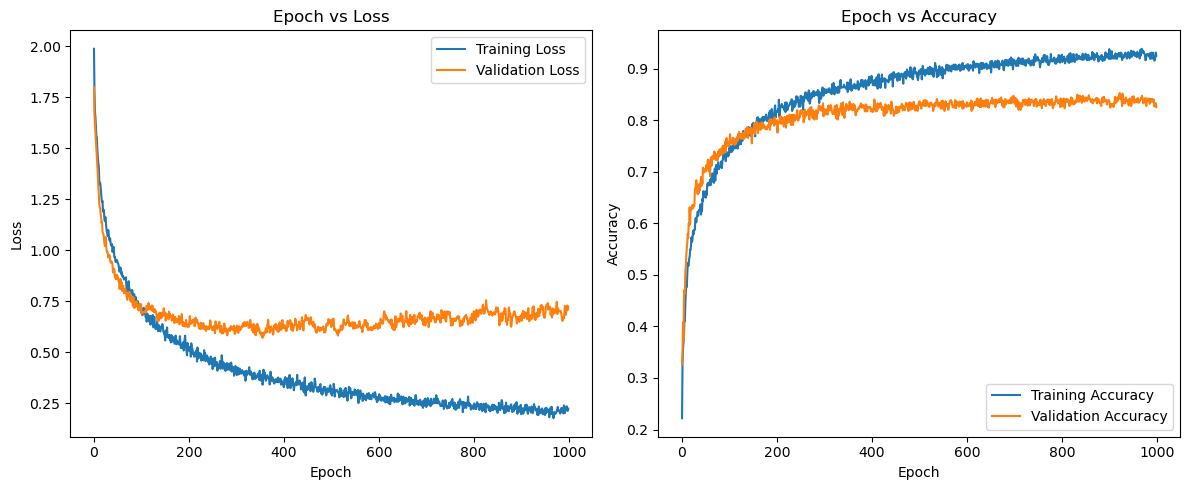

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.74%
Test Accuracy: 82.84%


In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [20]:
label_mapping = {
    'CW_Circle': 0,
    'CCW_Circle': 1,
    'CW_Square': 2,
    'CCW_Square': 3,
    'CW_Triangle': 4,
    'CCW_Triangle': 5,
    'Double_Tap': 6,
    'S': 7
}

6/6 [==============================] - 0s 1ms/step


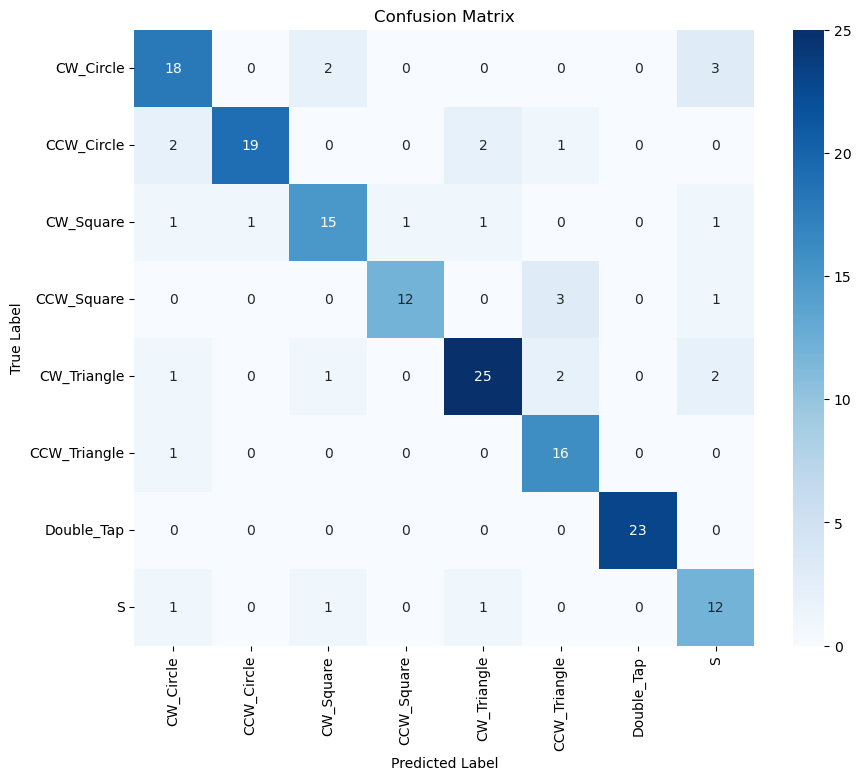

Classification Report:
              precision    recall  f1-score   support

   CW_Circle       0.75      0.78      0.77        23
  CCW_Circle       0.95      0.79      0.86        24
   CW_Square       0.79      0.75      0.77        20
  CCW_Square       0.92      0.75      0.83        16
 CW_Triangle       0.86      0.81      0.83        31
CCW_Triangle       0.73      0.94      0.82        17
  Double_Tap       1.00      1.00      1.00        23
           S       0.63      0.80      0.71        15

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.82       169
weighted avg       0.84      0.83      0.83       169



In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Prepare true labels
if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Prepare class names for classification report
class_names = [name for name, label in label_mapping.items()]

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


Gini Coefficients:
CW_Circle: 0.91
CCW_Circle: 0.96
CW_Square: 0.94
CCW_Square: 0.90
CW_Triangle: 0.89
CCW_Triangle: 0.98
Double_Tap: 1.00
S: 0.94


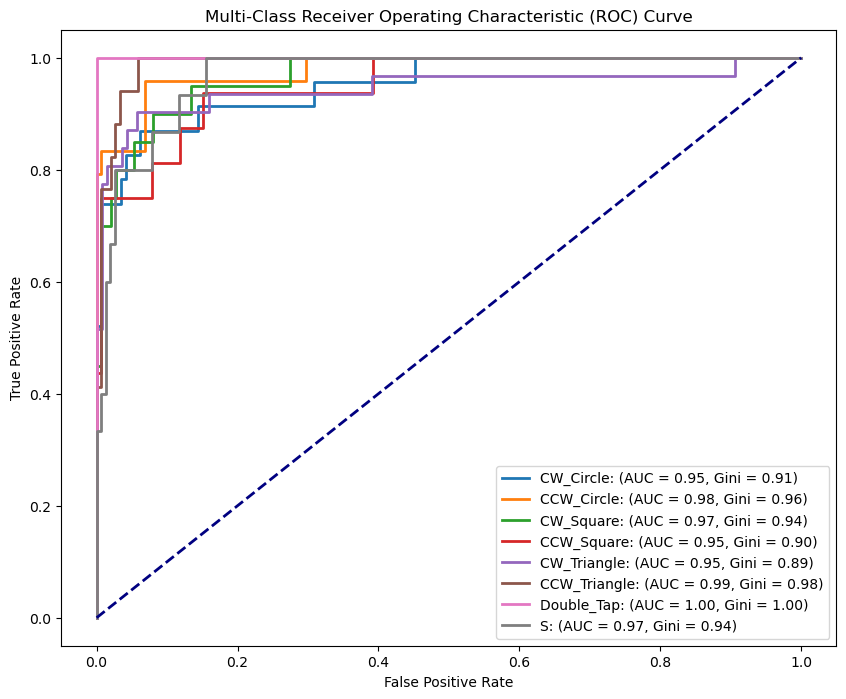

In [22]:
n_classes=8
y_test = np.array(y_test)  # Convert to numpy array if y_test is a pandas Series/DataFrame
y_pred = np.array(y_pred)  # Convert to numpy array if y_pred is a pandas Series/DataFrame

# If y_test is not one-hot encoded (1D array of class labels), convert it
if len(y_test.shape) == 1:
    y_test_one_hot = np.eye(n_classes)[y_test]  # One-hot encode y_test
else:
    y_test_one_hot = y_test  # Already one-hot encoded

# Compute ROC AUC for each class
roc_auc = []
for i in range(n_classes):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])  # Use one-hot encoded y_test
    roc_auc.append(auc)

# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients with class names
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    print(f"{class_name}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot with class names
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])  # Get ROC curve data for each class
    plt.plot(fpr, tpr, lw=2, label=f'{class_name}: (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()